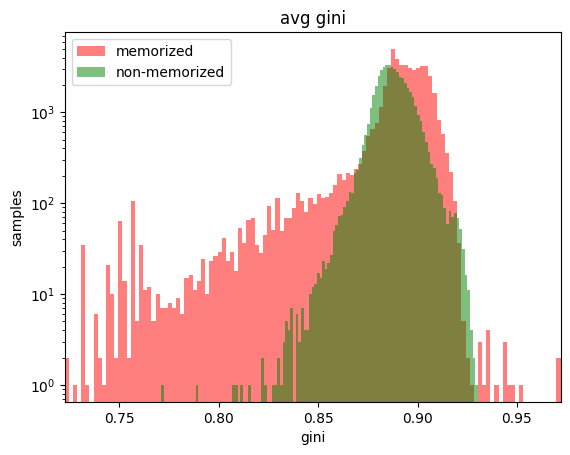

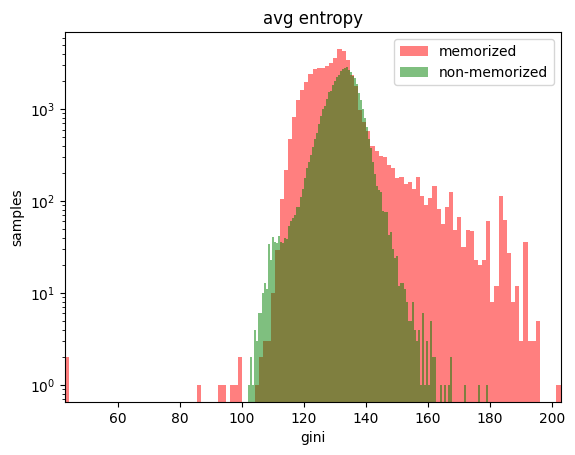

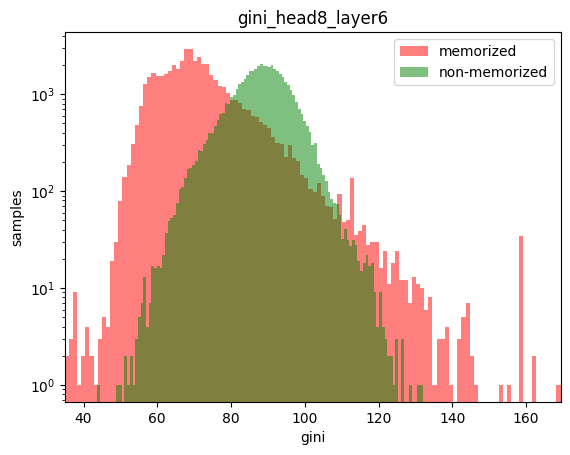

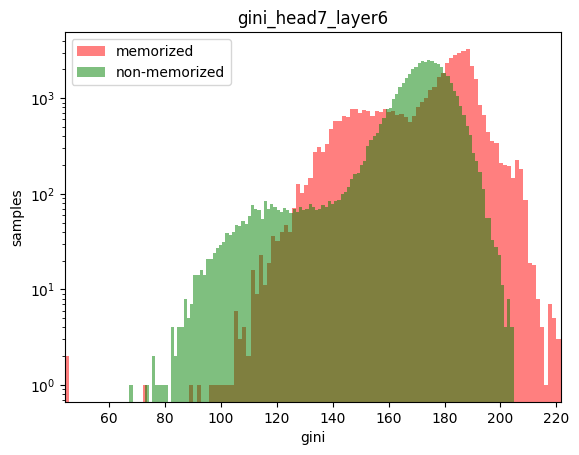

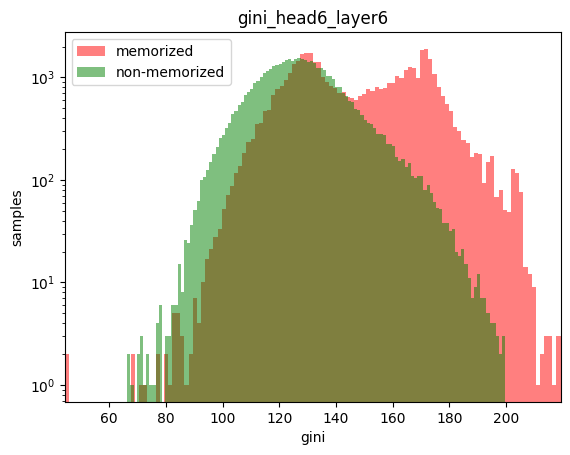

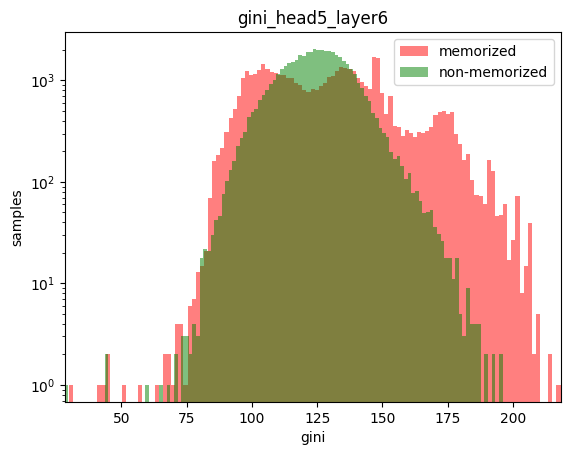

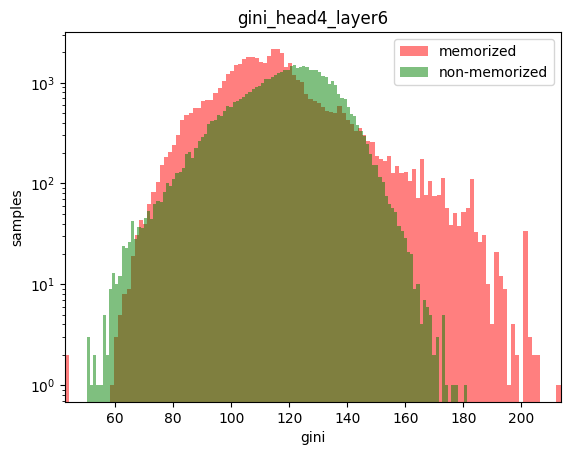

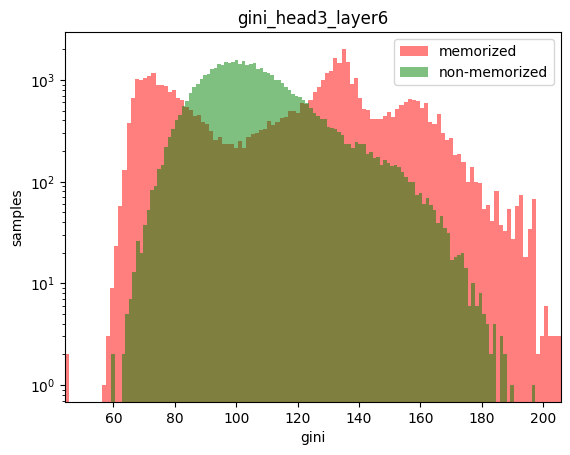

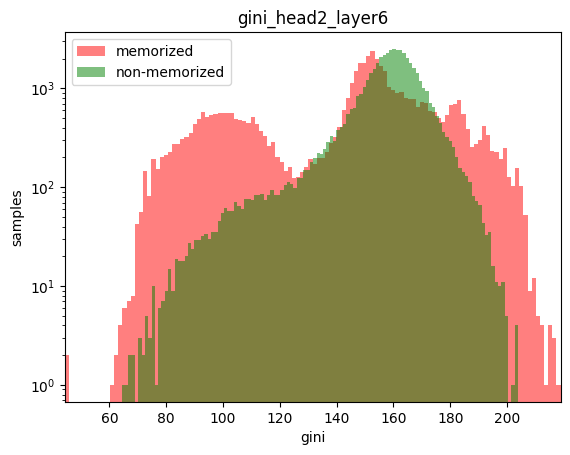

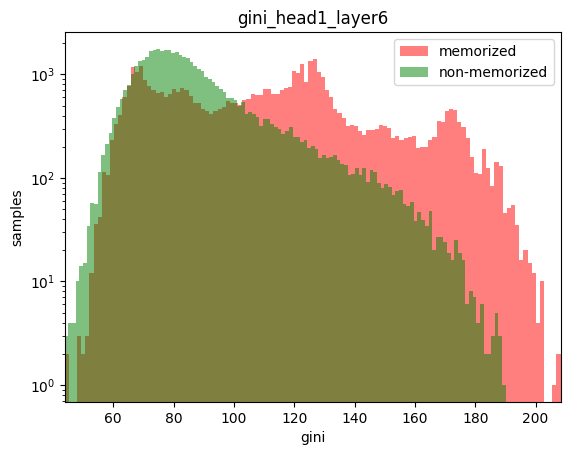

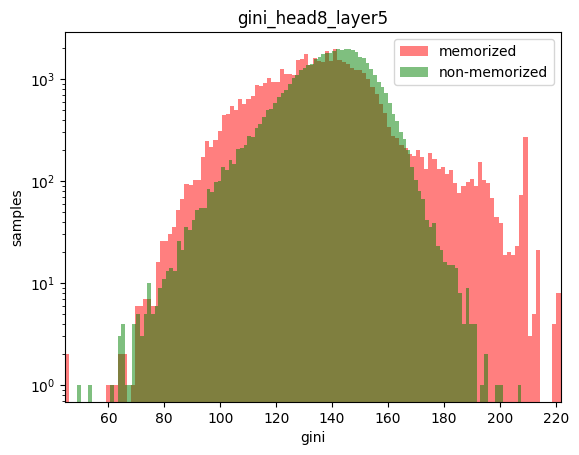

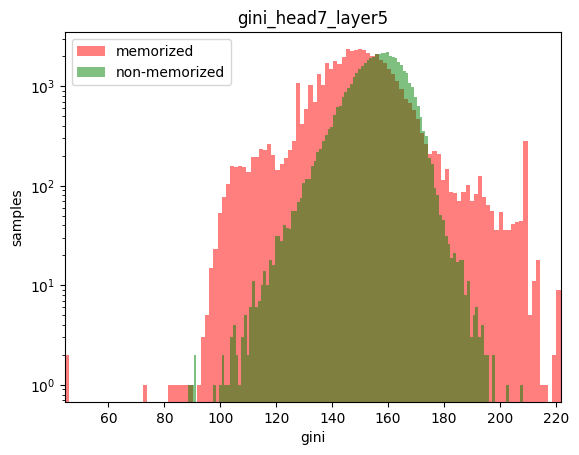

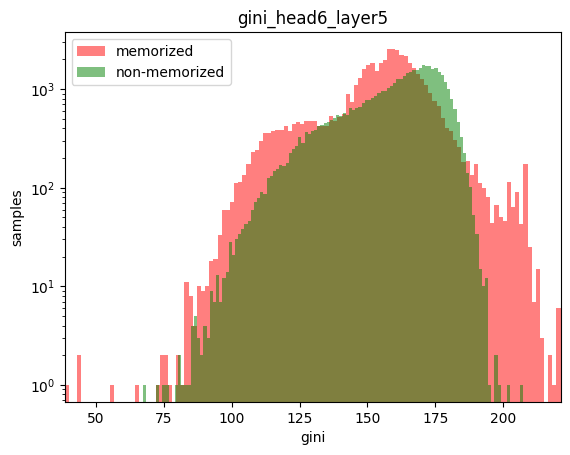

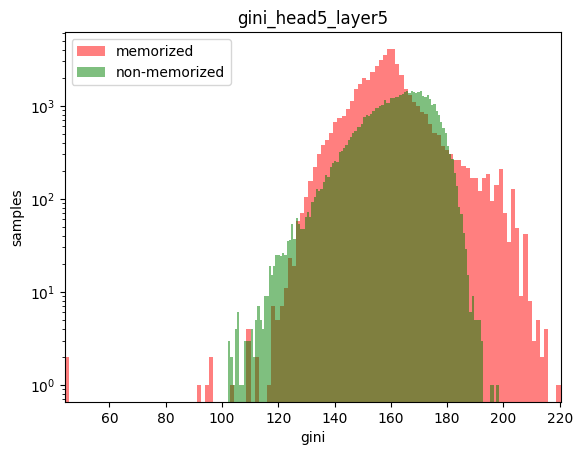

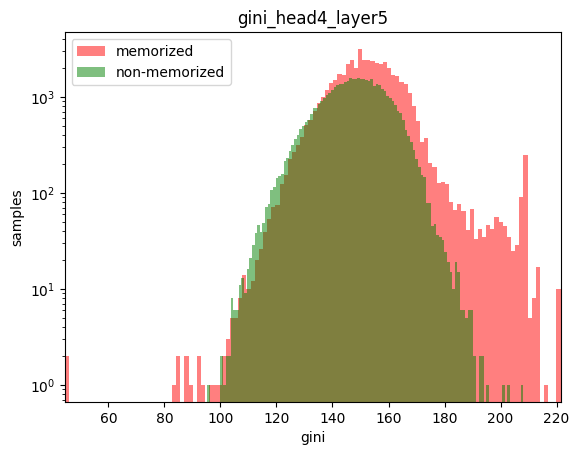

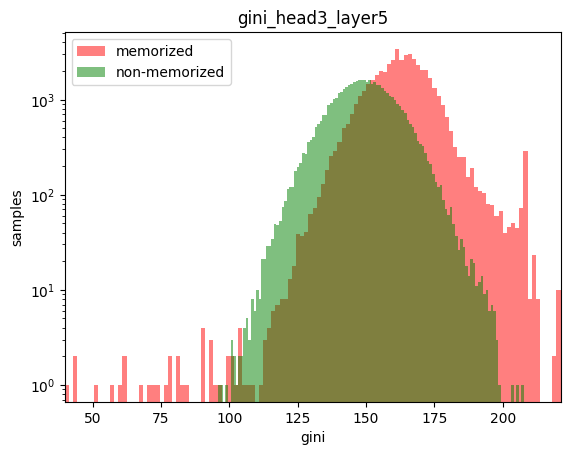

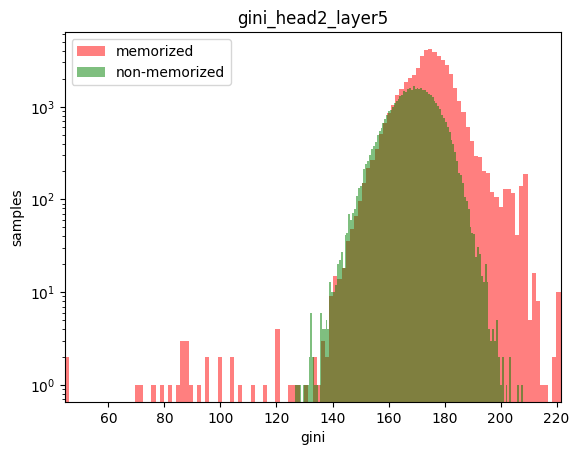

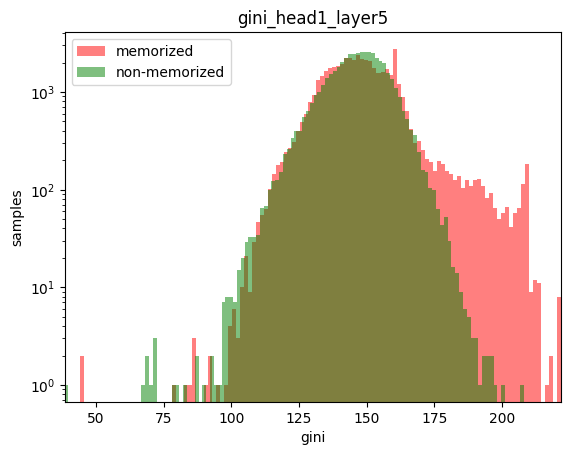

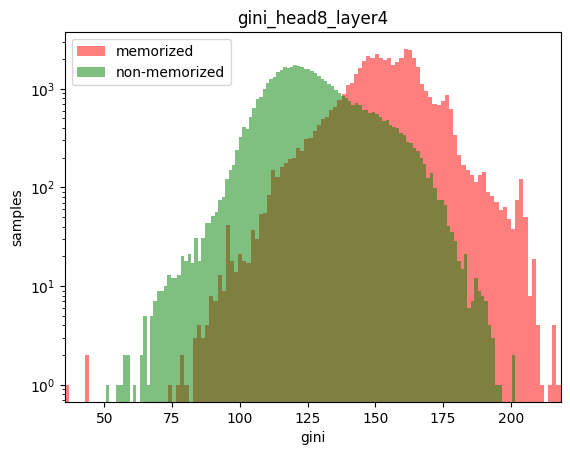

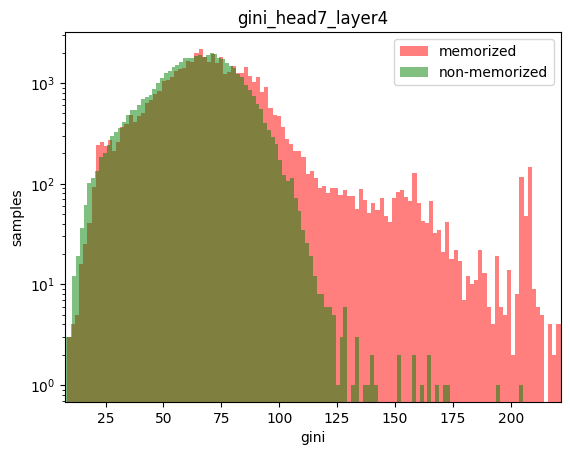

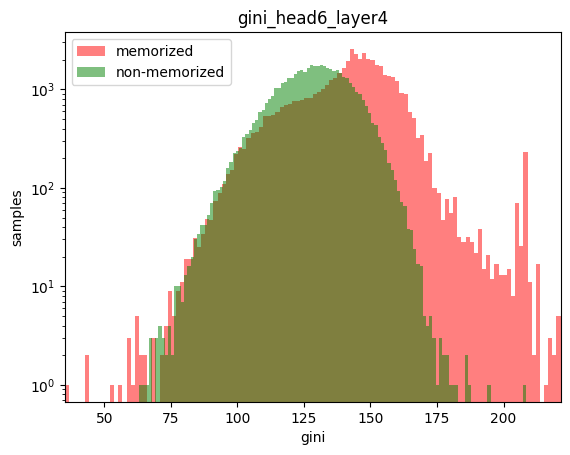

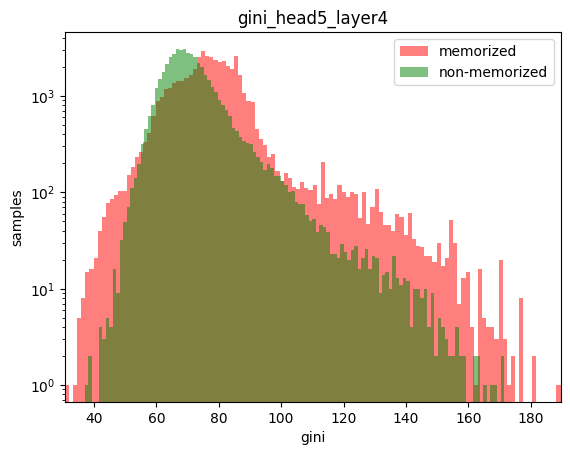

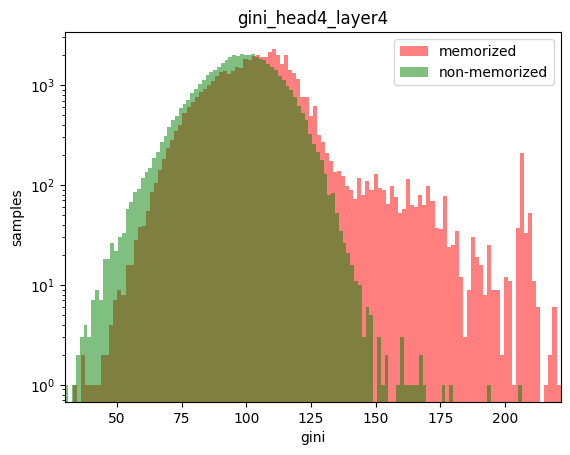

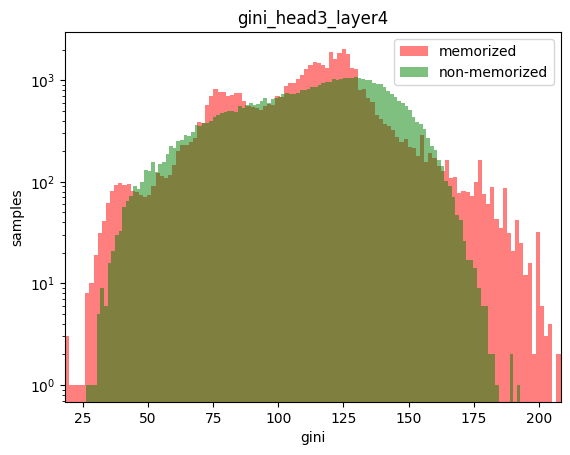

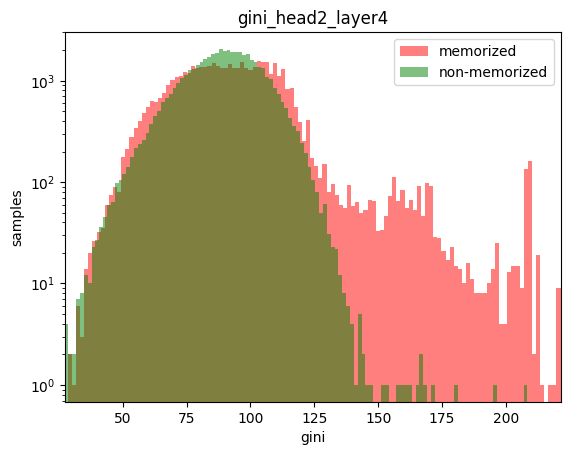

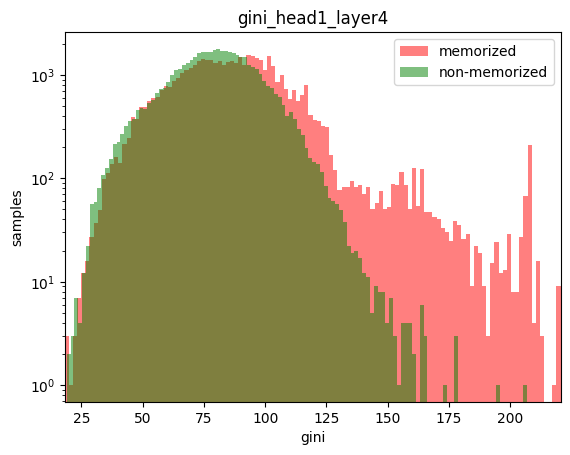

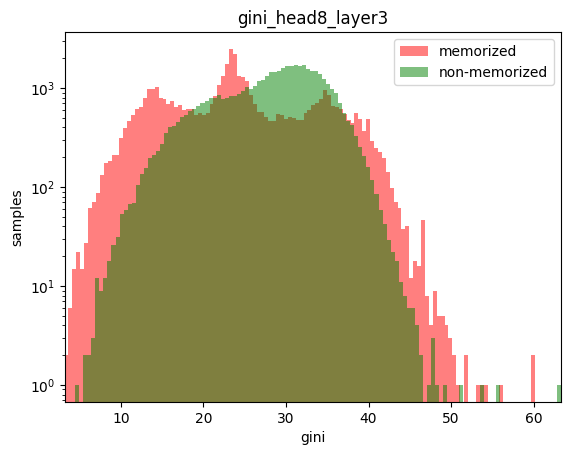

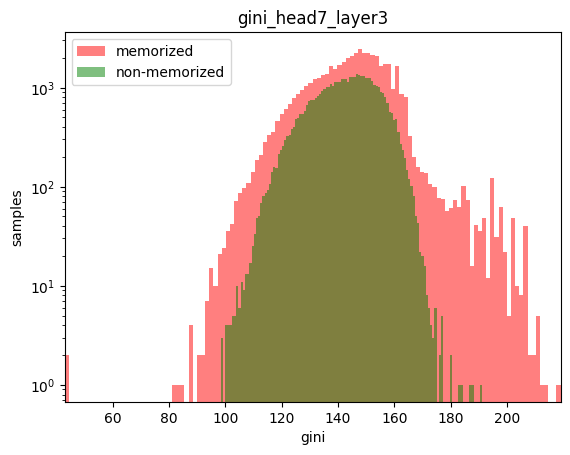

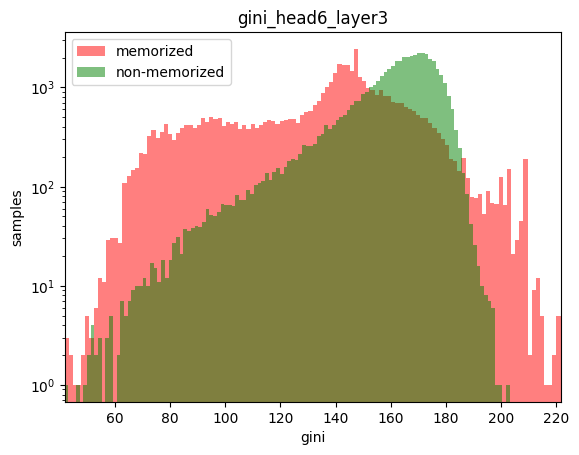

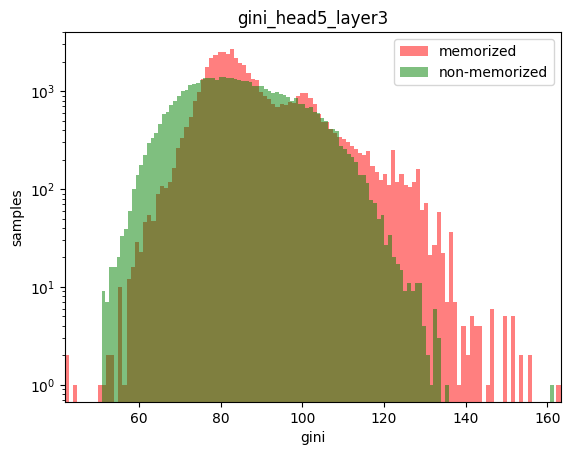

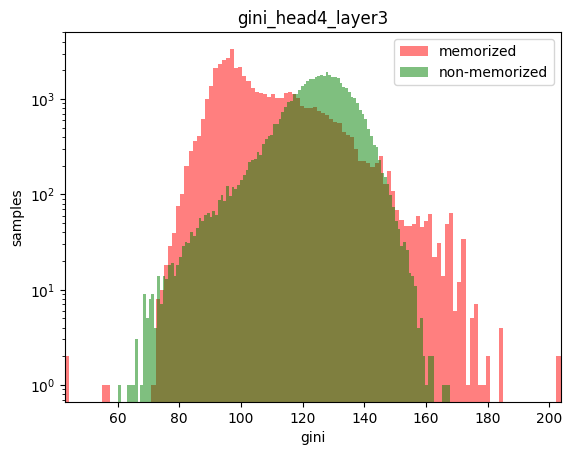

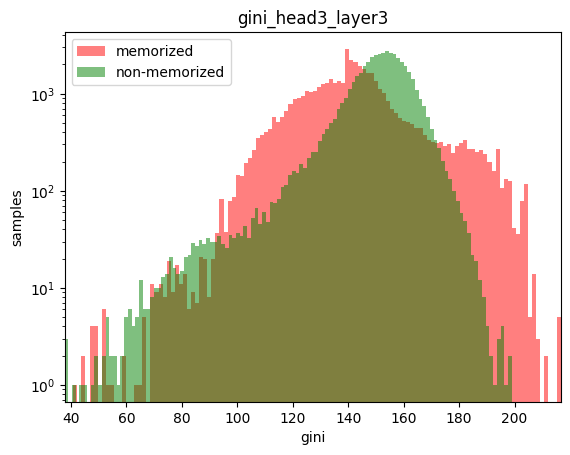

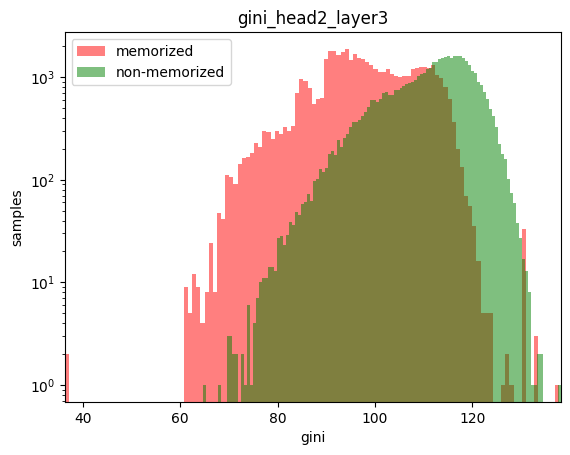

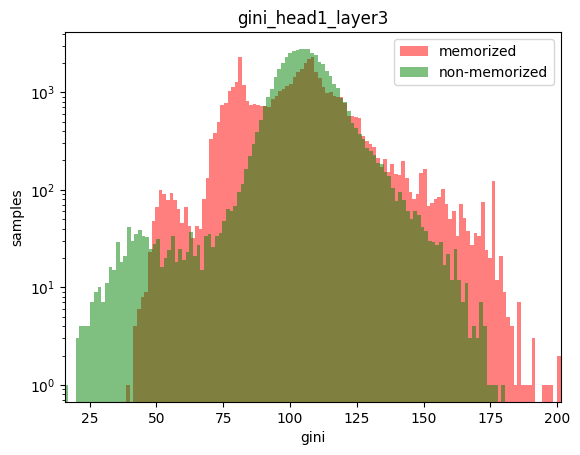

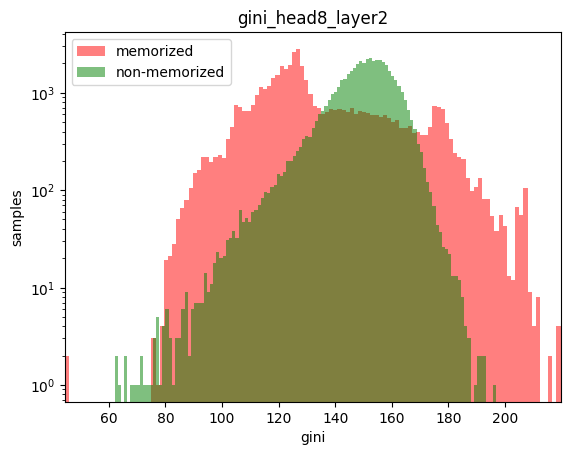

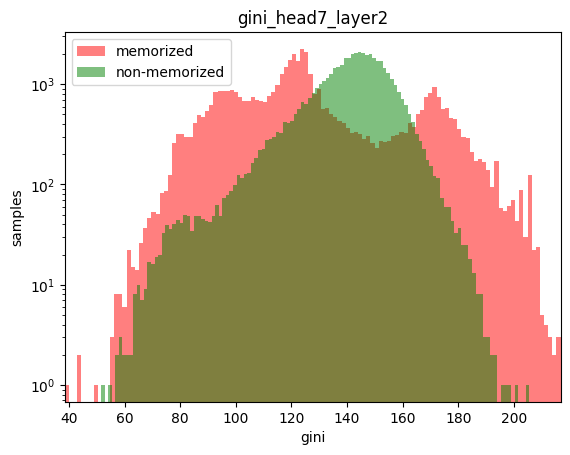

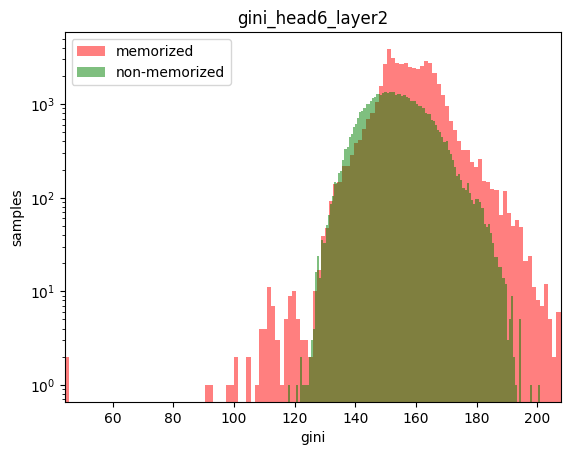

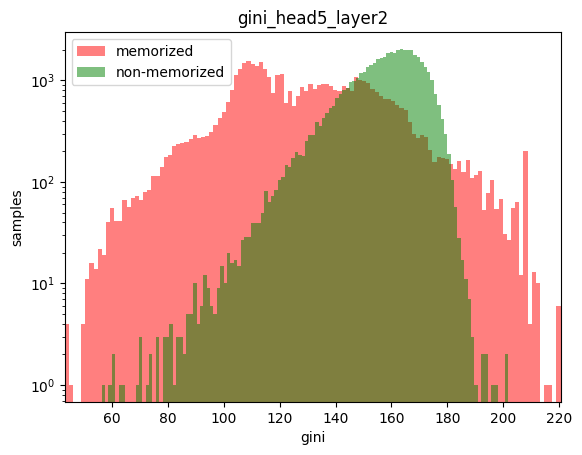

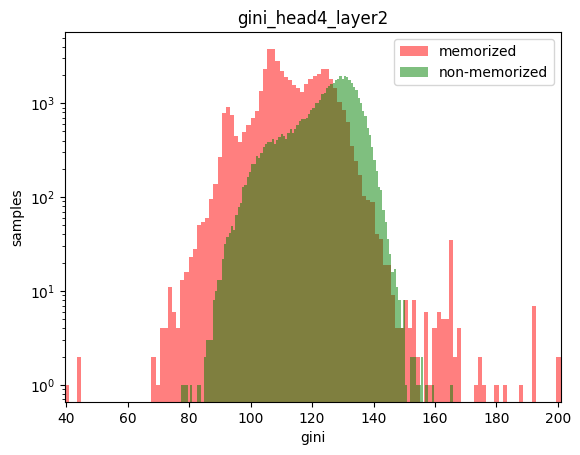

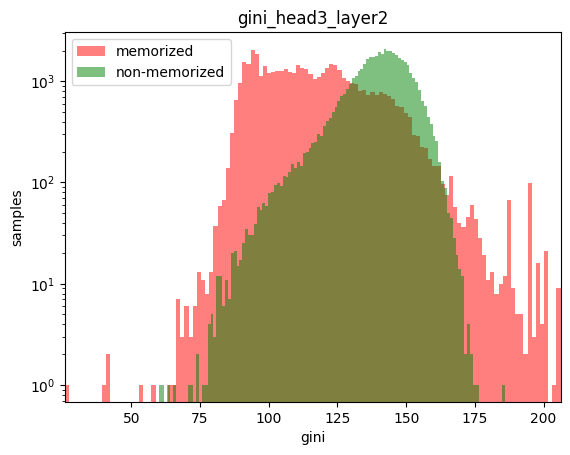

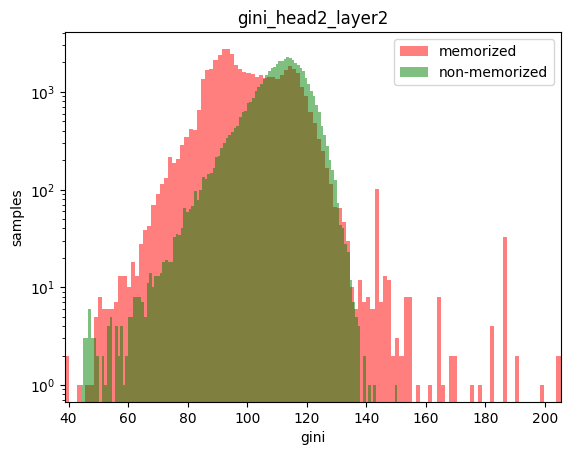

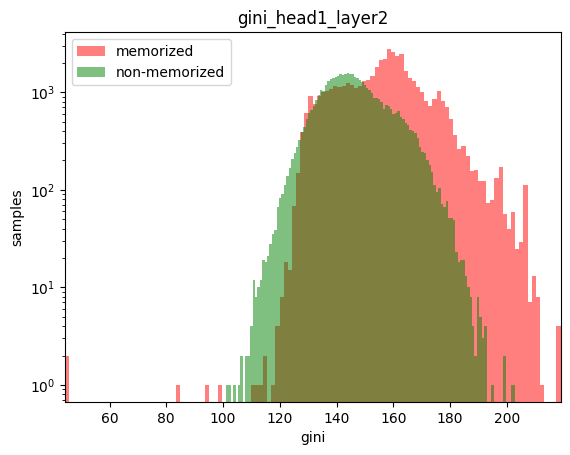

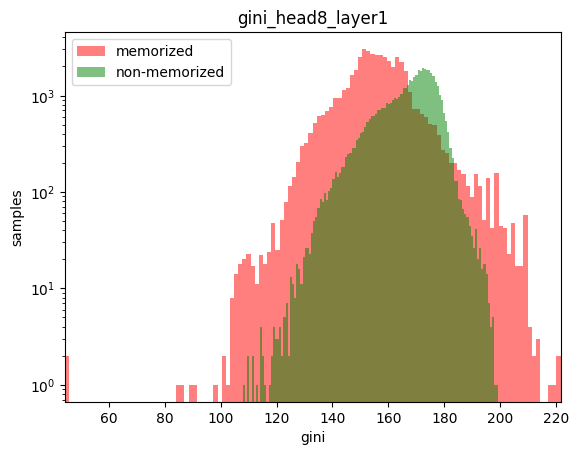

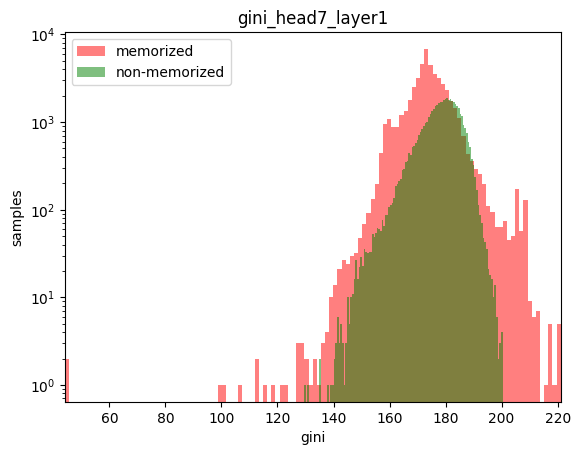

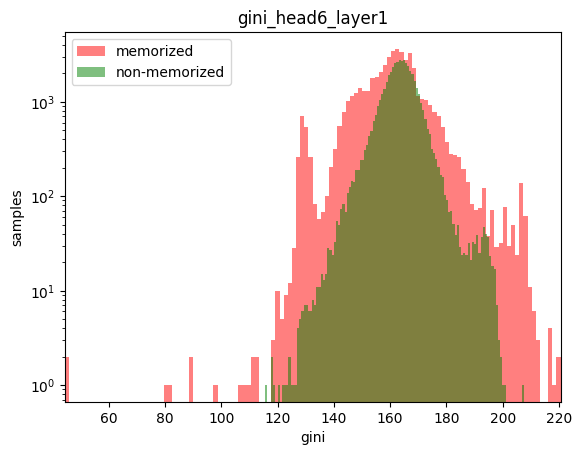

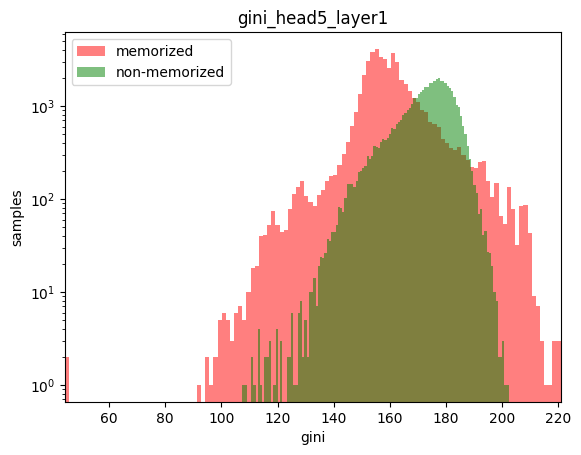

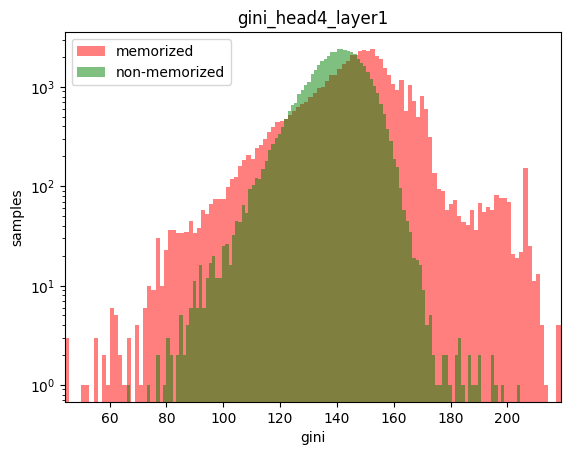

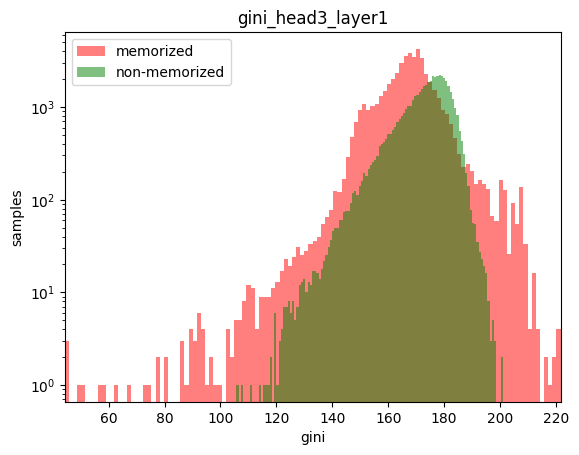

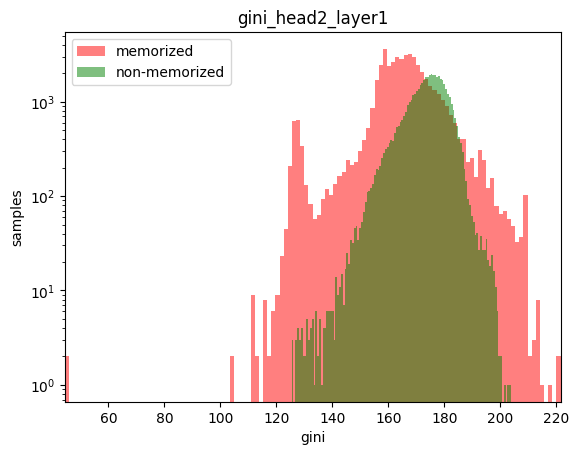

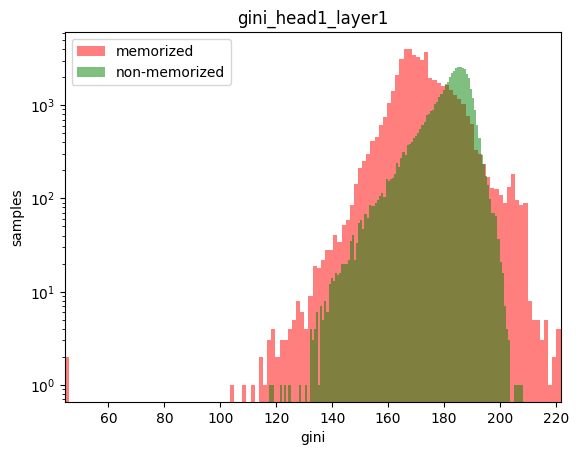

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df_pile = pd.read_csv('datasets/70m_ckp3_p/pile_deduped_70m.csv')
df_pile = df_pile.apply(pd.to_numeric, errors='coerce').dropna()
 
df_mem = pd.read_csv('datasets/70m_ckp3_m/memories_deduped_70m.csv')
df_mem = df_mem.apply(pd.to_numeric, errors='coerce').dropna()

df_pile = df_pile.drop('index', axis=1)
df_mem = df_mem.drop('index', axis=1)
new_df = pd.concat([df_pile, df_mem], axis=1)


def plot_histogram(df_mem, df_pile, column):
    x1 = df_mem[column]
    x2 = df_pile[column]


    plt.hist(x1, bins=120, alpha=0.5, color='red', label='memorized')
    plt.hist(x2, bins=120, alpha=0.5, color='green', label='non-memorized')
    plt.xlabel("attention metrics")
    plt.ylabel("samples")
    plt.xlim(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
    plt.yscale("log")
    plt.title(column)  
    plt.legend()
    plt.show()


for column in reversed(df_mem.columns):
    plot_histogram(df_mem, df_pile, column)